### This notebook demonstrates two methods for determining the optimal value for 'k' in KMeans.
#### Link to the tutorial is: 'https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb'

## 1. The _Elbow_ method.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
#Create a dataset with 3 random clusters and 1000 datapoints.
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, 
                 shuffle = True, random_state = 31)

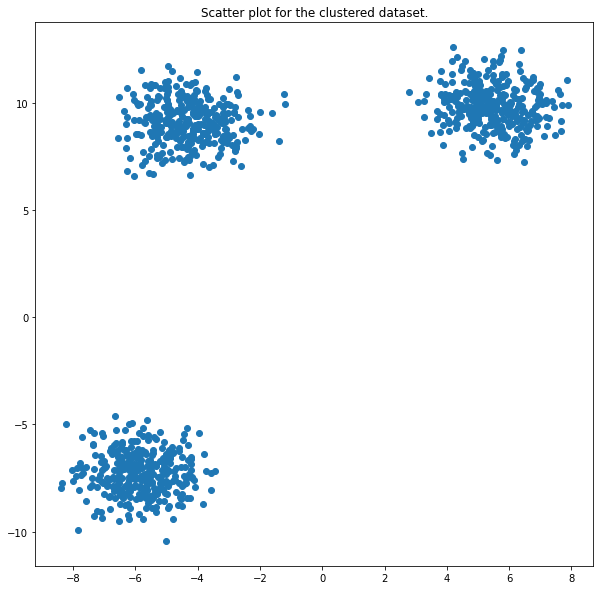

In [3]:
plt.figure(figsize = (10, 10))
plt.title('Scatter plot for the clustered dataset.')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

- Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

#### Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:

- The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.

- The WSS score is the sum of these Squared Errors for all the points.

- Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

In [4]:
wcss = [] 
for item in range(1, 11):
    kmeans = KMeans(n_clusters = item, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

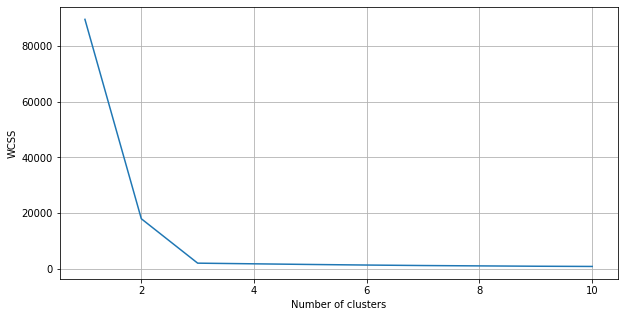

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### The point at which the elbow shape is created is 3.(Optimal value.)

## 2. The _Silhouette_ method.

- The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

- The Euclidean distance is used as the distance metric.

In [6]:
sil = []
kmax = 10

#Dissimilarity would not be defined for a single cluster, 
#thus the min number of clusters shpuld be 2.
for item in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = item).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

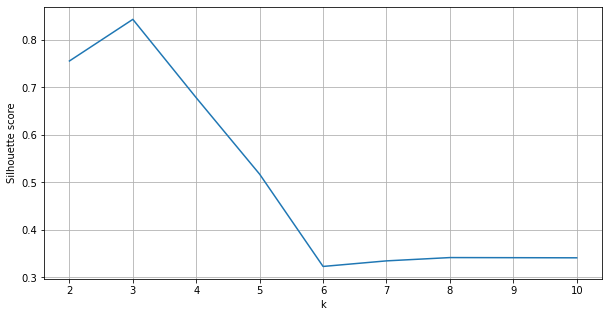

In [7]:
plt.figure(figsize = (10, 5))
plt.plot(range(2, 11), sil)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

#### There's a clear peak at k = 3, thus our optimal value.

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

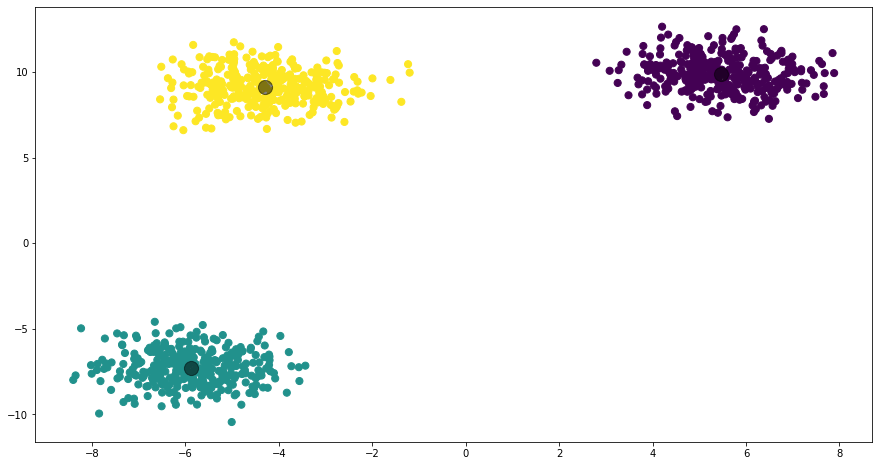

In [9]:
plt.figure(figsize = (15, 8))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
plt.show()